In [1]:
import os

In [2]:
# Settings
#data_dir = '/SCRATCH/users/alexandresayal/BIDS-BRAINPLAYBACK-TASK2/'
data_dir = '/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2/'
space_label = "MNI152NLin2009cAsym"
derivatives_folder = "derivatives/fmriprep23"
task_label = "02a"
out_dir = os.path.join(data_dir,"derivatives","nilearn_glm")

In [3]:
# condition names
condition_names = ['JoyfulActivation', 'Nostalgia', 'Peacefulness', 'Power', 'Sadness', 'Tenderness', 'Tension', 'Transcendence', 'Wonder']

# create strings for contrasts in the format of "condition_name - Noise"
contrasts = []

# add contrast all conditions vs. noise
contrasts.append("Peacefulness + Tenderness + Transcendence + Nostalgia + Power + JoyfulActivation + Tension + Sadness + Wonder - Noise*9")

# iterate to add the other contrasts
for condition in condition_names:
    contrasts.append(condition + " - Noise")

# add more contrasts based on the grouping variables Sublimity, Vitality, and Unease
contrasts.append("Wonder + Transcendence + Tenderness + Nostalgia + Peacefulness - Noise*5") # sublimity
contrasts.append("Power + JoyfulActivation - Noise*2") # vitality
contrasts.append("Tension + Sadness - Noise*2") # unease

# and between the grouping variables
contrasts.append("Wonder*0.2 + Transcendence*0.2 + Tenderness*0.2 + Nostalgia*0.2 + Peacefulness*0.2 - Power*0.5 - JoyfulActivation*0.5") # sublimity vs. vitality
contrasts.append("Power + JoyfulActivation - Tension - Sadness") # vitality vs. unease
contrasts.append("Tension*0.5 + Sadness*0.5 - Wonder*0.2 - Transcendence*0.2 - Tenderness*0.2 - Nostalgia*0.2 - Peacefulness*0.2") # unease vs. sublimity

# Rename the contrasts list to remove white spaces and replace '-' with 'minus' and '+' with 'plus' and remove '*' and remove numbers
# This is to use the contrasts as names for the output files
contrasts_renamed = []

for contrast in contrasts:
    contrast = contrast.replace(" ", "")
    contrast = contrast.replace("-", "Minus")
    contrast = contrast.replace("+", "Plus")
    contrast = contrast.replace("*", "")
    contrast = ''.join((x for x in contrast if not x.isdigit()))
    contrast = contrast.replace(".", "")
    
    contrasts_renamed.append(contrast)

contrasts_renamed


['PeacefulnessPlusTendernessPlusTranscendencePlusNostalgiaPlusPowerPlusJoyfulActivationPlusTensionPlusSadnessPlusWonderMinusNoise',
 'JoyfulActivationMinusNoise',
 'NostalgiaMinusNoise',
 'PeacefulnessMinusNoise',
 'PowerMinusNoise',
 'SadnessMinusNoise',
 'TendernessMinusNoise',
 'TensionMinusNoise',
 'TranscendenceMinusNoise',
 'WonderMinusNoise',
 'WonderPlusTranscendencePlusTendernessPlusNostalgiaPlusPeacefulnessMinusNoise',
 'PowerPlusJoyfulActivationMinusNoise',
 'TensionPlusSadnessMinusNoise',
 'WonderPlusTranscendencePlusTendernessPlusNostalgiaPlusPeacefulnessMinusPowerMinusJoyfulActivation',
 'PowerPlusJoyfulActivationMinusTensionMinusSadness',
 'TensionPlusSadnessMinusWonderMinusTranscendenceMinusTendernessMinusNostalgiaMinusPeacefulness']

In [5]:
# extract z value from ROIs 'a1', 'hippo', 'putamen' for the 10 first contrasts
roiList = ['a1', 'amygdala', 'putamen']
contrastList = contrasts_renamed[1:10]

# create a data frame of the z values for each ROI and each contrast
import pandas as pd
import numpy as np
from nilearn.input_data import NiftiMasker
from nilearn.image import load_img
from nilearn.masking import apply_mask

df = pd.DataFrame(columns=['ROI', 'Contrast', 'z_value'])

for rr in range(len(roiList)):

    roi_path = os.path.join(data_dir,"derivatives","nilearn_glm","group",f'mask_{roiList[rr]}.nii.gz')

    for cc in range(len(contrastList)):

        map_path = os.path.join(data_dir,"derivatives","nilearn_glm","group",f'group_task-{task_label}_stat-z_con-_{contrasts_renamed[cc]}.nii.gz')

        z_val = np.mean(apply_mask(map_path, roi_path))

        df.loc[len(df)] = [roiList[rr], contrastList[cc], z_val]   

(-0.9, 5.1)

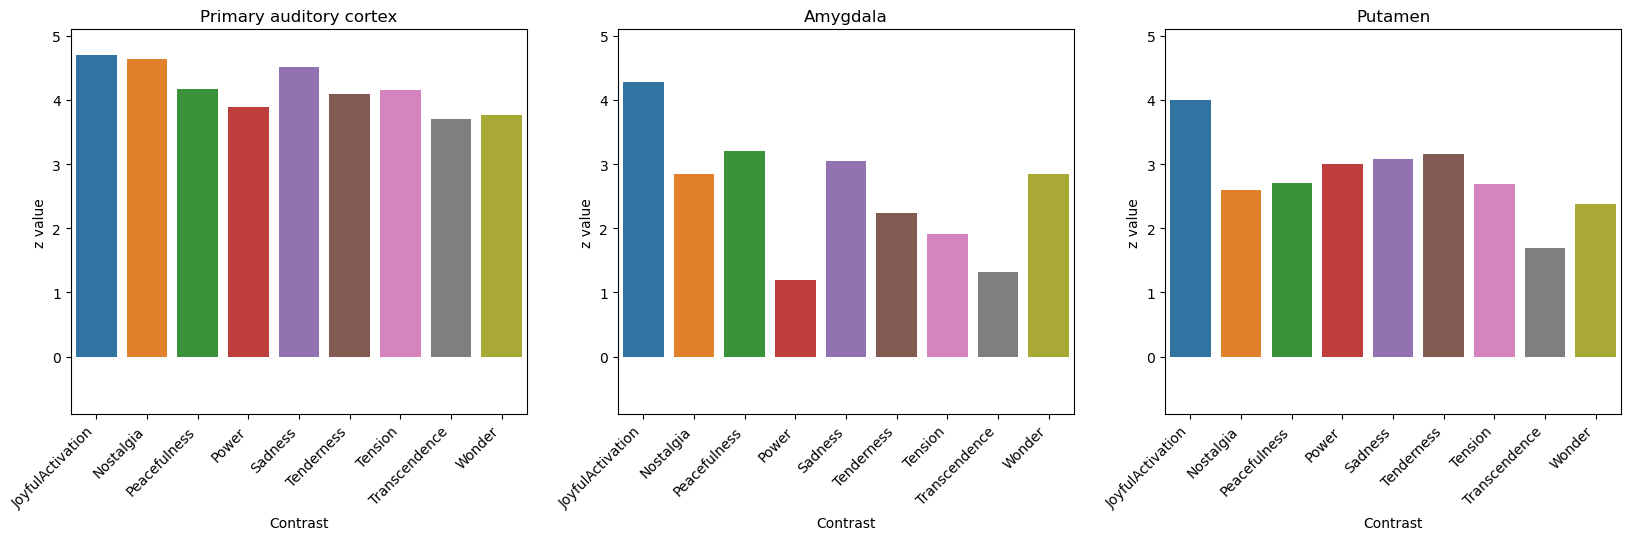

In [7]:
# create a subplot with 1 row, three columns with barplots for each ROI
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.barplot(ax=axes[0], x="Contrast", y="z_value", data=df[df['ROI'] == 'a1']) 
# set condition names as xticklabels and rotate them 45 degrees
axes[0].set_xticklabels(condition_names, rotation=45, ha='right')
axes[0].set_title('Primary auditory cortex')
axes[0].set_xlabel('Contrast')
axes[0].set_ylabel('z value')
axes[0].set_ylim(-0.9, 5.1)

sns.barplot(ax=axes[1], x="Contrast", y="z_value", data=df[df['ROI'] == 'amygdala'])
axes[1].set_xticklabels(condition_names, rotation=45, ha='right')
axes[1].set_title('Amygdala')
axes[1].set_xlabel('Contrast')
axes[1].set_ylabel('z value')
axes[1].set_ylim(-0.9, 5.1)

sns.barplot(ax=axes[2], x="Contrast", y="z_value", data=df[df['ROI'] == 'putamen'])
axes[2].set_xticklabels(condition_names, rotation=45, ha='right')
axes[2].set_title('Putamen')
axes[2].set_xlabel('Contrast')
axes[2].set_ylabel('z value')
axes[2].set_ylim(-0.9, 5.1)
